In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("D:GC/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [2]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

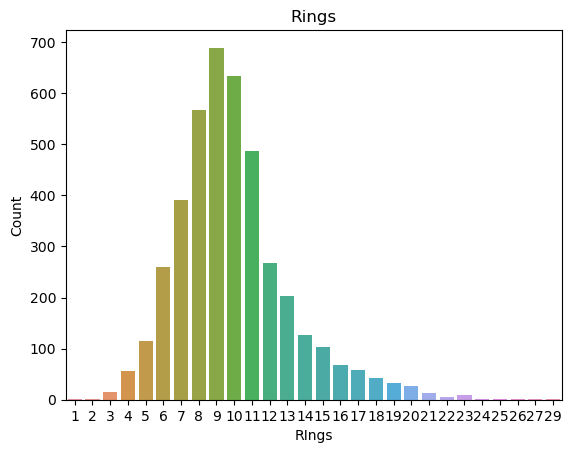

In [3]:
sns.countplot(data = df, x="Rings")
plt.xlabel("RIngs")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
label_encoder = LabelEncoder()

# 'sex' 열 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# 변환된 데이터셋 저장 (선택적)
df.to_csv('ablone.csv', index=False)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [6]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [7]:
Y = pd.get_dummies(y).values

In [8]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [15]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341,), (836, 8), (836,))

In [16]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239 (956.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 95.9107 - mse: 95.9107 - val_loss: 70.3451 - val_mse: 70.3451
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.0275 - mse: 59.0275 - val_loss: 25.6829 - val_mse: 25.6829
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2594 - mse: 19.2594 - val_loss: 11.3256 - val_mse: 11.3256
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.0158 - mse: 11.0158 - val_loss: 9.5796 - val_mse: 9.5796
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0671 - mse: 9.0671 - val_loss: 8.6085 - val_mse: 8.6085
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0851 - mse: 8.0851 - val_loss: 8.0450 - val_mse: 8.0450
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7821 - mse: 7.7821 - val_loss: 7.6613 - val_mse: 7.6613
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8381 - mse: 7.8381 - val_loss: 7.4403 - val_mse: 7.4403
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s

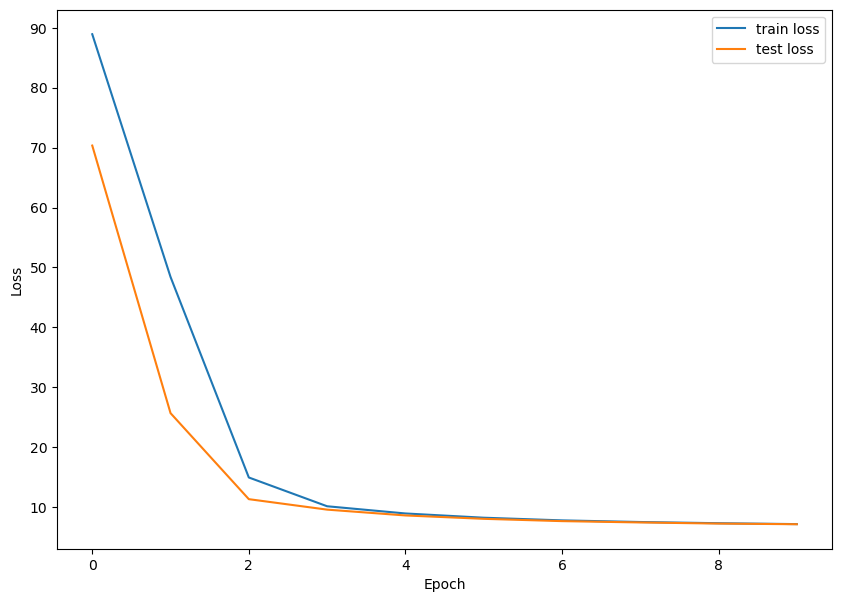

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7125 - mse: 6.7125 


[7.143725395202637, 7.143725395202637]